a. Download the following audio files and store them in the same directory as this lab file:

http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab13/song1.wav
http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab17/song2.wav


These are free sounds downloaded from
http://freemusicarchive.org/music/Jahzzar/Travellers_Guide/Siesta
and
http://freemusicarchive.org/music/Black_Ant/Free_Beats_Sel_3/Fater_Lee

b. Now load them into variables:

In [9]:
song1 = wavReadMono("Lab15_data/song1.wav")
song2 = wavReadMono("Lab17_data/song2.wav")

#Listen to them if you'd like:
play(song1)
play(song2)

In [10]:
#This code adds a 5000Hz sine wave to the first 1 second of song1, then stores it in a new variable:
t = np.arange(0, 1, 1/44100)
song1_5000 = song1[0:44100] + 0.3 * sin(2*pi*5000*t)
play(song1) #normal song
play(song1_5000) #song with alarm

In [13]:
?signal.firwin

In [ ]:
f1 = 5020/22050 #ratio of the Nyquist
f2 = 5040/22050 #ratio of the Nyquist

print f1
print f2

b = signal.firwin(1001, [f1, f2]) # Band-stop filter (from help file for signal.firwin)

The code below is wraps up the example code at the end of the signal.freqz help file, and puts it in one function called plotResponse. Once you run the cell below, you can call plotResponse to plot the frequency response of any filter coefficeint array. The x-axis is frequency, from 0 to the Nyquist rate (which is pi radians per sample). On the y-axis, you will see the magnitude response in blue and the phase response in green.


In [25]:
def plotResponse(myCoeffs):
    w, h = signal.freqz(myCoeffs) #get frequency response for h
    fig = plt.figure()
    plt.title('Digital filter frequency response')
    ax1 = fig.add_subplot(111)

    plt.plot(w, 20 * np.log10(abs(h)), 'b') #plot in dB scale, wow!
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Frequency [rad/sample]')

    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    plt.plot(w, angles, 'g')
    plt.ylabel('Angle (radians)', color='g')
    plt.grid()
    plt.axis('tight')
    plt.show()

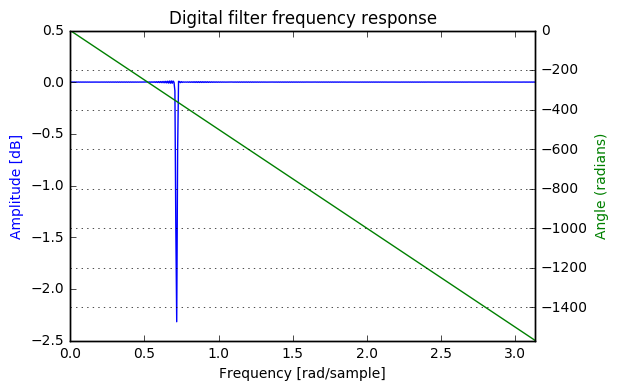

In [27]:
plotResponse(b)